# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | planeta rica
Processing Record 12 of Set 1 | kingsbridge
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | hinton
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | christiana
Processing Record 18 of Set 1 | tataouine
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | dar naim
City not found. Skipping...
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,11.98,32,25,7.60,CA,1684631227
1,waingapu,-9.6567,120.2641,27.01,64,30,7.22,ID,1684631337
2,margaret river,-33.9500,115.0667,14.01,66,99,4.93,AU,1684631338
3,saipan,15.1355,145.7010,32.39,100,0,4.92,MP,1684631114
4,tura,25.5198,90.2201,24.98,77,1,2.90,IN,1684631338


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,11.98,32,25,7.60,CA,1684631227
1,waingapu,-9.6567,120.2641,27.01,64,30,7.22,ID,1684631337
2,margaret river,-33.9500,115.0667,14.01,66,99,4.93,AU,1684631338
3,saipan,15.1355,145.7010,32.39,100,0,4.92,MP,1684631114
4,tura,25.5198,90.2201,24.98,77,1,2.90,IN,1684631338


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

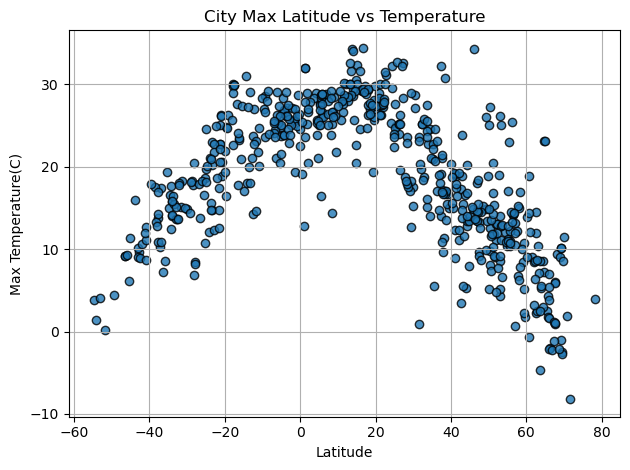

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs Temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

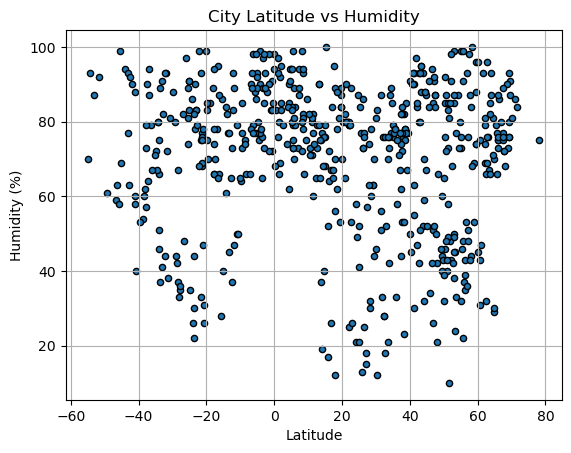

In [43]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind= "scatter",x="Lat", y="Humidity", grid= True, edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

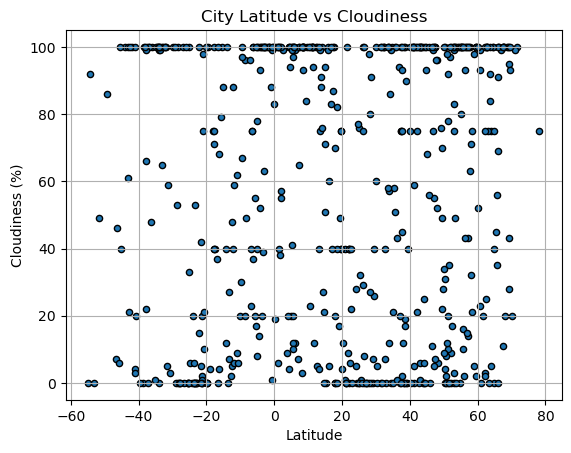

In [44]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind= "scatter",x="Lat", y="Cloudiness", grid= True, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

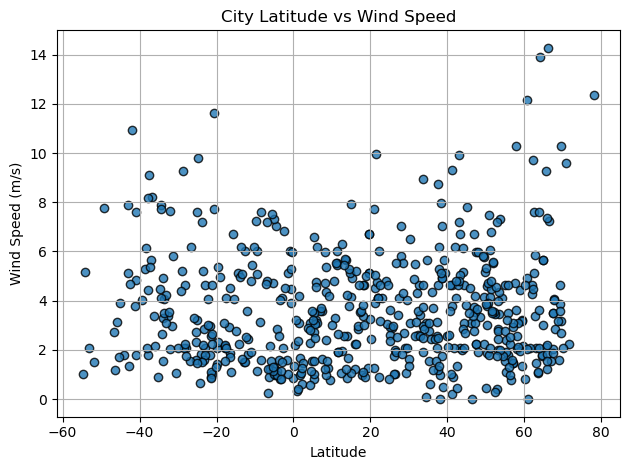

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,11.98,32,25,7.60,CA,1684631227
3,saipan,15.1355,145.7010,32.39,100,0,4.92,MP,1684631114
4,tura,25.5198,90.2201,24.98,77,1,2.90,IN,1684631338
6,badger,64.8000,-147.5333,23.14,29,40,5.66,US,1684631338
10,planeta rica,8.4147,-75.5883,25.15,93,100,4.34,CO,1684631338


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waingapu,-9.6567,120.2641,27.01,64,30,7.22,ID,1684631337
2,margaret river,-33.9500,115.0667,14.01,66,99,4.93,AU,1684631338
5,hermanus,-34.4187,19.2345,17.67,80,100,7.90,ZA,1684631338
7,port-aux-francais,-49.3500,70.2167,4.50,61,86,7.75,TF,1684631338
8,puerto ayora,-0.7393,-90.3518,25.86,91,99,4.47,EC,1684631338


###  Temperature vs. Latitude Linear Regression Plot

r-value= -0.8146745733429052


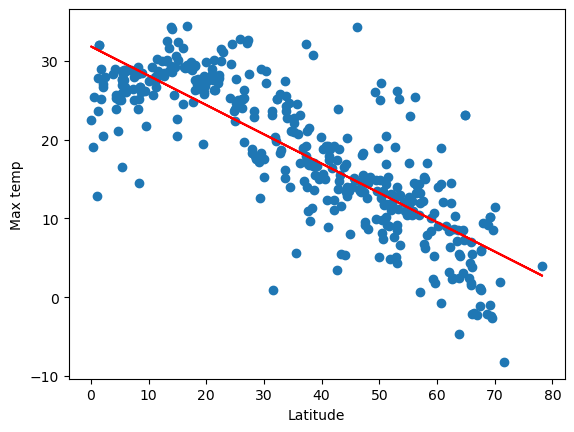

In [49]:
# Linear regression on Northern Hemisphere
xValues=northern_hemi_df["Lat"]
yValues= northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, sterr= linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"r-value= {rvalue}")
y= slope * xValues + intercept
y_equation= f"y= {slope:.2f}x + {intercept:.2f}"
plt.scatter(xValues, yValues)
plt.plot(xValues, y, color="red")
plt.annotate(y_equation,(0,-30), color= "red")

plt.ylabel("Max temp")
plt.xlabel("Latitude")
plt.show()

r-value= 0.8279298970274455


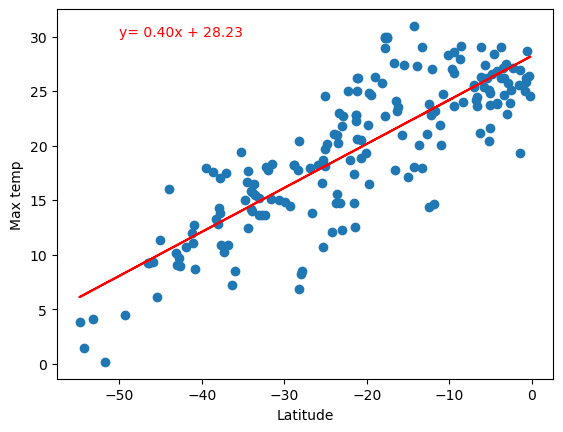

In [50]:
# Linear regression on Southern Hemisphere
xValues=southern_hemi_df["Lat"]
yValues=southern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, sterr= linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"r-value= {rvalue}")
y= slope * xValues + intercept
y_equation= f"y= {slope:.2f}x + {intercept:.2f}"
plt.scatter(xValues, yValues)
plt.plot(xValues, y, color="red")
plt.annotate(y_equation,(-50,30), color= "red")

plt.ylabel("Max temp")
plt.xlabel("Latitude")
plt.show()


**Discussion about the linear relationship:** 
There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.8146745733429052 on Northern Hemisphere.
There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.8279298970274455 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r-value= 0.031441584236562084


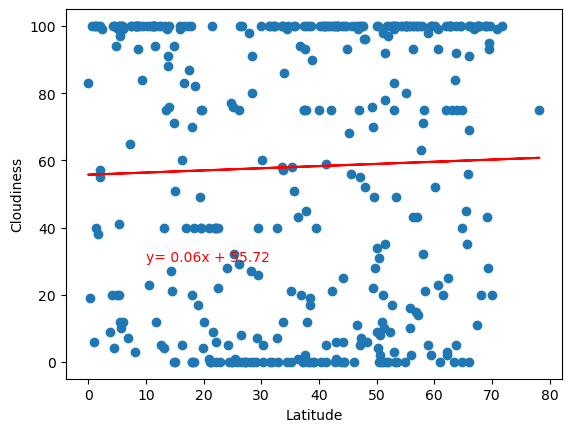

In [51]:
# Northern Hemisphere
xValues=northern_hemi_df["Lat"]
yValues= northern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, sterr= linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f"r-value= {rvalue}")
y= slope * xValues + intercept
y_equation= f"y= {slope:.2f}x + {intercept:.2f}"
plt.scatter(xValues, yValues)
plt.plot(xValues, y, color="red")
plt.annotate(y_equation,(10,30), color= "red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

r-value= 0.09128294084883638


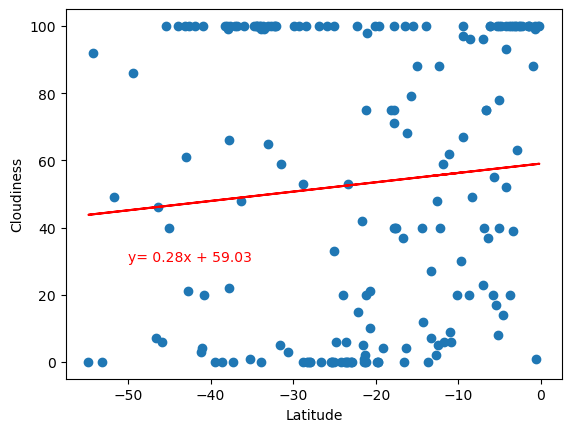

In [52]:
# Southern Hemisphere
xValues=southern_hemi_df["Lat"]
yValues=southern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, sterr= linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f"r-value= {rvalue}")
y= slope * xValues + intercept
y_equation= f"y= {slope:.2f}x + {intercept:.2f}"
plt.scatter(xValues, yValues)
plt.plot(xValues, y, color="red")
plt.annotate(y_equation,(-50,30), color= "red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** In both southern and northern hemispheres, we see positive linear relationships as as latitude increases, cloudiness also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.031441584236562084


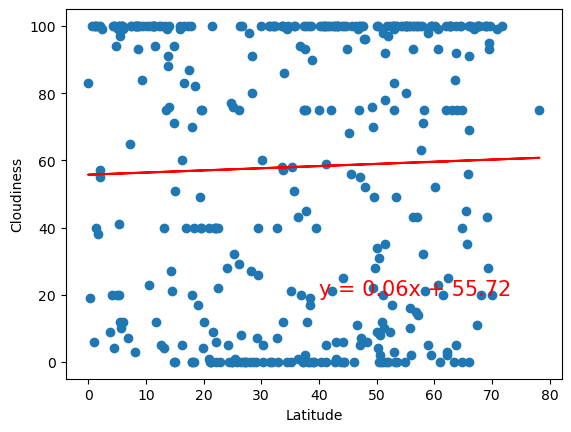

In [53]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')


The r-value is 0.09128294084883638


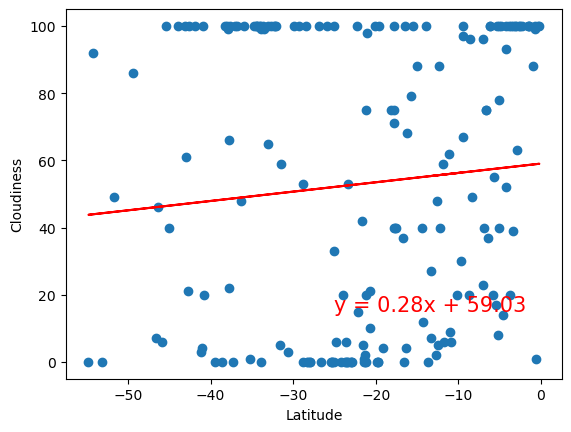

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There does not appear to be a coorelation between latitude and cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.148252297218863


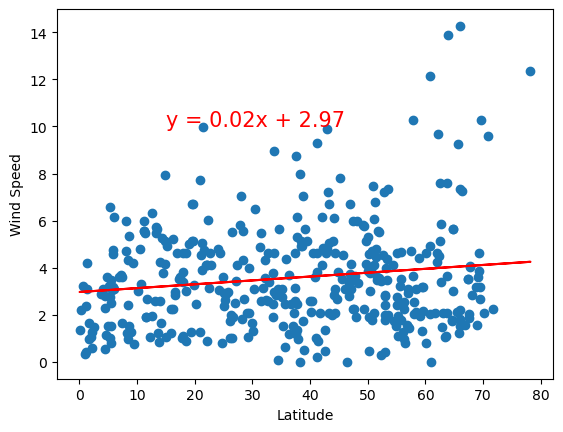

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.14150703476592738


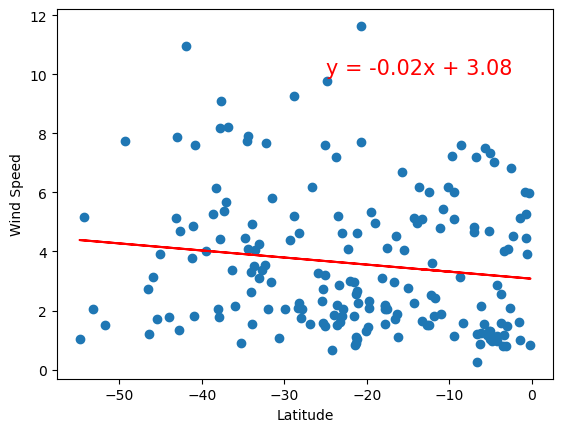

In [56]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There does not appear to be a coorelation between latitude and wind speed.
